In [211]:
from Bio import Cluster
from Bio import Phylo
from Bio.Phylo import TreeConstruction as tc
from Bio.Phylo import Consensus as cons
from Bio.Blast import NCBIWWW
from Bio import SearchIO
import numpy as np
import matplotlib.pyplot as plt

In [212]:
alias_dict = {
    "AAA98797.1": ("albumin_HomoSapiens", "HomoSapiens"),
    "XP_002745783.2": ("albumin_CallithrixJacchus", "CallithrixJacchus"),
    "XP_004038851.2": ("albumin_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045388761.1": ("albumin_LemurCatta", "LemurCatta"),
    "XP_050646263.1": ("albumin_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "XP_517233.3": ("albumin_PanTroglodytes", "PanTroglodytes"),
    "XP_031520350.1": ("albumin_PapioAnubis", "PapioAnubis"),
    "NP_001127106.2": ("albumin_PongoAbelii", "PongoAbelii"),
    "XP_010340891.1": ("albumin_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_032116870.1": ("albumin_SapajusApella", "SapajusApella"),
    "BAA04809.1": ("collagen_HomoSapiens", "HomoSapiens"),
    "XP_035145207.1": ("collagen_CallithrixJacchus", "CallithrixJacchus"),
    "XP_004064730.1": ("collagen_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045393893.1": ("collagen_LemurCatta", "LemurCatta"),
    "XP_050633116.1": ("collagen_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "XP_016798387.1": ("collagen_PanTroglodytes", "PanTroglodytes"),
    "XP_003918171.2": ("collagen_PapioAnubis", "PapioAnubis"),
    "XP_009233428.2": ("collagen_PongoAbelii", "PongoAbelii"),
    "XP_039320049.1": ("collagen_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_032106760.1": ("collagen_SapajusApella", "SapajusApella"),
    "AAA59172.1": ("insulin_HomoSapiens", "HomoSapiens"),
    "XP_035119627.1": ("insulin_CallithrixJacchus", "CallithrixJacchus"),
    "XP_018891846.1": ("insulin_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045414405.1": ("insulin_LemurCatta", "LemurCatta"),
    "XP_050613945.1": ("insulin_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "XP_016775240.1": ("insulin_PanTroglodytes", "PanTroglodytes"),
    "XP_017803627.2": ("insulin_PapioAnubis", "PapioAnubis"),
    "XP_024110664.1": ("insulin_PongoAbelii", "PongoAbelii"),
    "XP_010329449.1": ("insulin_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_032124369.1": ("insulin_SapajusApella", "SapajusApella"),
    "AAB59562.1": ("keratin_HomoSapiens", "HomoSapiens"),
    "XP_010328935.2": ("keratin_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_017828210.1": ("keratin_CallithrixJacchus", "CallithrixJacchus"),
    "XP_050618685.1": ("keratin_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "XP_003315486.1": ("keratin_PanTroglodytes", "PanTroglodytes"),
    "XP_030867326.1": ("keratin_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_003913035.2": ("keratin_PapioAnubis", "PapioAnubis"),
    "XP_002834383.2": ("keratin_PongoAbelii", "PongoAbelii"),
    "XP_045382465.1": ("keratin_LemurCatta", "LemurCatta"),
    "XP_032135581.1": ("keratin_SapajusApella", "SapajusApella"),
    "KAI4036329.1": ("lactase_HomoSapiens", "HomoSapiens"),
    "XP_002749525.1": ("lactase_CallithrixJacchus", "CallithrixJacchus"),
    "XP_018877691.1": ("lactase_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045415226.1": ("lactase_LemurCatta", "LemurCatta"),
    "XP_050606971.1": ("lactase_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "XP_016805242.2": ("lactase_PanTroglodytes", "PanTroglodytes"),
    "XP_003909221.3": ("lactase_PapioAnubis", "PapioAnubis"),
    "XP_024099033.1": ("lactase_PongoAbelii", "PongoAbelii"),
    "XP_003922057.2": ("lactase_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_032142216.1": ("lactase_SapajusApella", "SapajusApella"),
    "CAA25109.1": ("myoglobin_HomoSapiens", "HomoSapiens"),
    "P02152.2": ("myoglobin_CallithrixJacchus", "CallithrixJacchus"),
    "XP_018874110.1": ("myoglobin_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045408951.1": ("myoglobin_LemurCatta", "LemurCatta"),
    "XP_024208661.1": ("myoglobin_PanTroglodytes", "PanTroglodytes"),
    "XP_003905518.1": ("myoglobin_PapioAnubis", "PapioAnubis"),
    "NP_001125556.1": ("myoglobin_PongoAbelii", "PongoAbelii"),
    "XP_003932968.1": ("myoglobin_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "P02153.2": ("myoglobin_SapajusApella", "SapajusApella"),
    "XP_050662610.1": ("myoglobin_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "CAA86293.1": ("myosin_HomoSapiens", "HomoSapiens"),
    "XP_008994767.2": ("myosin_CallithrixJacchus", "CallithrixJacchus"),
    "XP_018868909.2": ("myosin_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_045381205.1": ("myosin_LemurCatta", "LemurCatta"),
    "XP_050621552.1": ("myosin_MacacaThibetanaThibetana", "MacacaThibetanaThibetana"),
    "NP_001347814.2": ("myosin_PanTroglodytes", "PanTroglodytes"),
    "XP_009187945.3": ("myosin_PapioAnubis", "PapioAnubis"),
    "XP_024091345.1": ("myosin_PongoAbelii", "PongoAbelii"),
    "XP_039332729.1": ("myosin_SaimiriBoliviensisBoliviensis", "SaimiriBoliviensisBoliviensis"),
    "XP_032136168.1": ("myosin_SapajusApella", "SapajusApella"),
    "NP_001032.2": ("sucrase-isomaltase_HomoSapiens", "HomoSapiens"),
    "XP_001159286.2": ("sucrase-isomaltase_PanTroglodytes", "PanTroglodytes"),
    "XP_018878624.1": ("sucrase-isomaltase_GorillaGorillaGorilla", "GorillaGorillaGorilla"),
    "XP_024100521.1": ("sucrase-isomaltase_PongoAbelii", "PongoAbelii"),
    "XP_031518793.1": ("sucrase-isomaltase_PapioAnubis", "PapioAnubis"),
    "XP_050634207.1": ("sucrase-isomaltase_MacacaThibetana", "MacacaThibetana"),
    "XP_035134018.1": ("sucrase-isomaltase_CallithrixJacchus", "CallithrixJacchus"),
    "XP_039336157.1": ("sucrase-isomaltase_SaimiriBoliviensis", "SaimiriBoliviensis"),
    "XP_032117438.1": ("sucrase-isomaltase_SapajusApella", "SapajusApella"),
    "XP_045412485.1": ("sucrase-isomaltase_LemurCatta", "LemurCatta"),
}


In [213]:
def matrix_parser(file, name_mode = 1):

    with open(file) as f:
        a = f.read().split("\n")[1:]

    b = [' '.join(i.split()).split(" ") for i in a]

    c = [i[0] for i in b][:-1]
    c = [alias_dict[x][name_mode] for x in c]

    d = [[float(j) for j in i[1:]] for i in b][:-1]
    e = [[0.0]]+[d[i][:i+1]  for i in range(1,len(d))]

    d = np.matrix(d)

    return d, e, c

In [214]:
def generate_tree(matrix, name_mode = 1):
    np_matrix, dist_matrix, names = matrix_parser(matrix, name_mode)
    dm = tc.DistanceMatrix(names=names, matrix=dist_matrix)
    constructor = tc.DistanceTreeConstructor(method='upgma')
    tree = constructor.upgma(dm)
    tree.rooted = True
    for node in tree.get_nonterminals():
    # Set the node name to an empty string
        node.name = ""
    return tree

def draw_tree(tree):
    Phylo.draw(tree=tree)

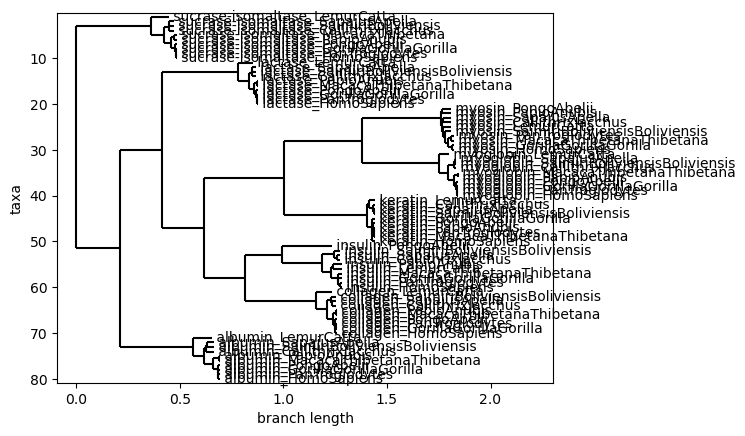

In [215]:
all_tree = generate_tree("proteins/matrices/all_matrix.txt", 0)
draw_tree(all_tree)

In [216]:
group_trees = {
    "albumin": generate_tree("proteins/matrices/albumin_matrix.txt"),
    "collagen": generate_tree("proteins/matrices/collagen_matrix.txt"),
    "insulin": generate_tree("proteins/matrices/insulin_matrix.txt"),
    "keratin": generate_tree("proteins/matrices/keratin_matrix.txt"),
    "lactase": generate_tree("proteins/matrices/lactase_matrix.txt"),
    "myoglobin": generate_tree("proteins/matrices/myoglobin_matrix.txt"),
    "myosin": generate_tree("proteins/matrices/myosin_matrix.txt"),
    "sucrase-isomaltase": generate_tree("proteins/matrices/sucrase-isomaltase_matrix.txt"),
}

group_cons = cons.majority_consensus(group_trees.values(), 0.5)

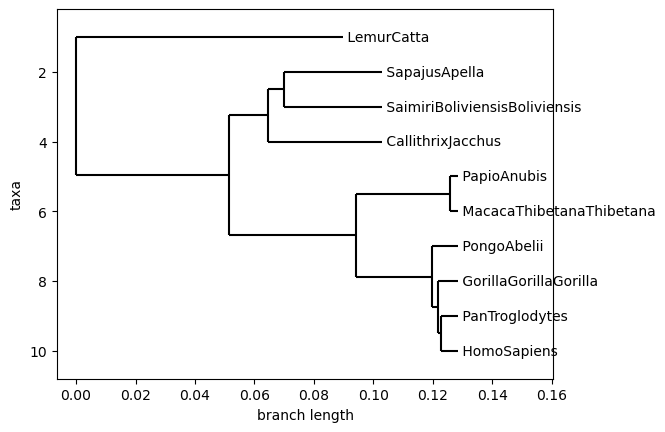

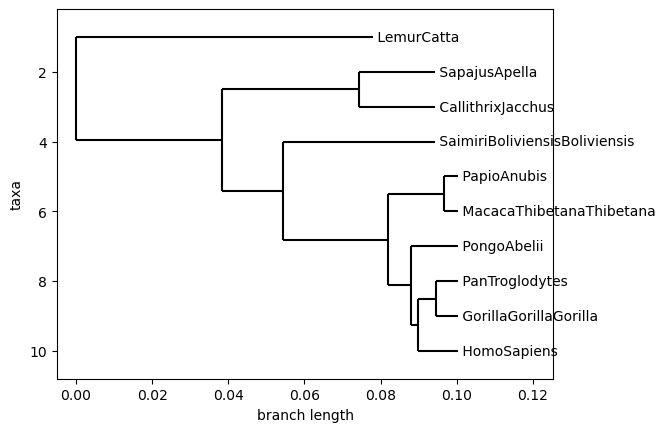

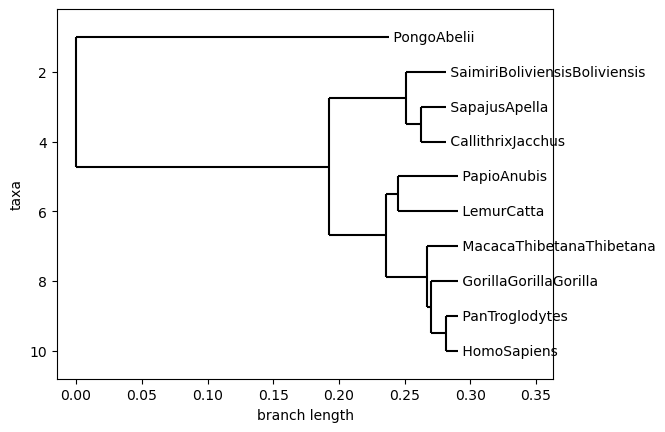

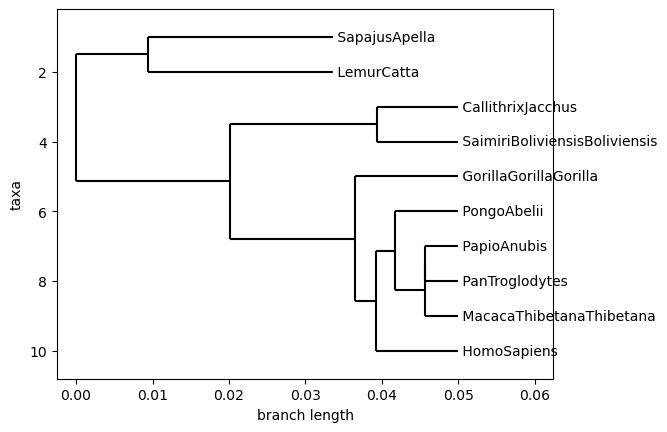

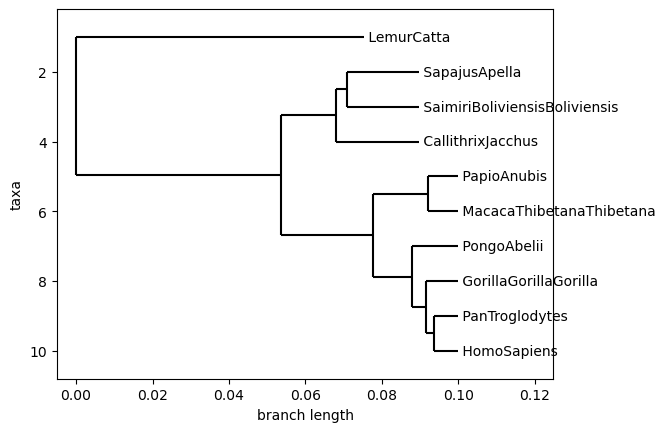

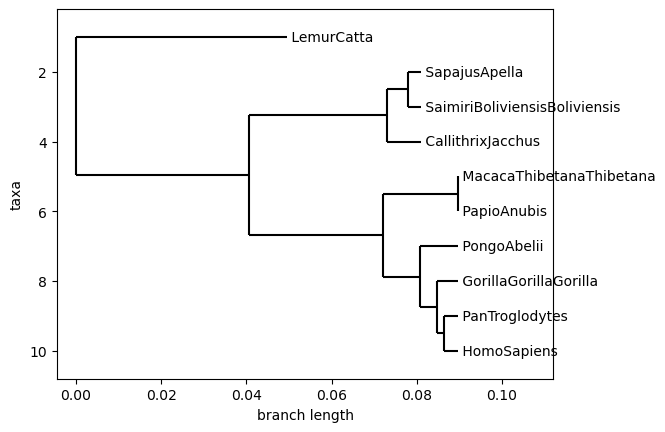

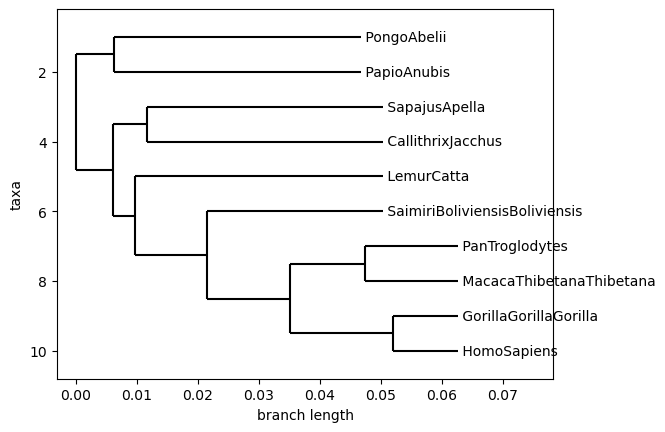

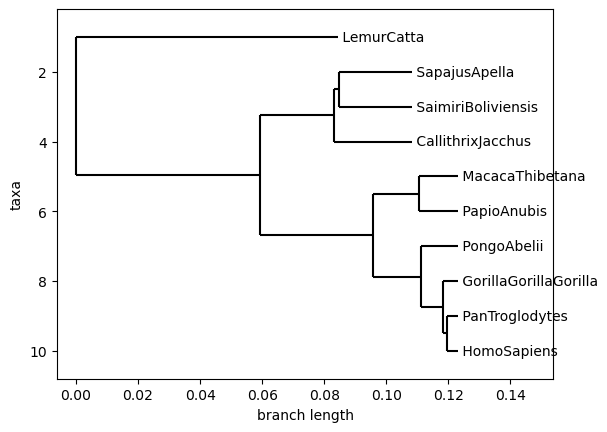

In [217]:
for i in group_trees.values():
    draw_tree(i)

In [225]:
cluster_trees = {
    "cluster0": generate_tree("proteins/matrices/cluster0_matrix.txt"),
    "cluster1": generate_tree("proteins/matrices/cluster1_matrix.txt"),
    "cluster2": generate_tree("proteins/matrices/cluster2_matrix.txt"),
    "cluster3": generate_tree("proteins/matrices/cluster3_matrix.txt"),
    #"cluster4": generate_tree("proteins/matrices/cluster4_matrix.txt"),
    "cluster5": generate_tree("proteins/matrices/cluster5_matrix.txt"),
    "cluster6": generate_tree("proteins/matrices/cluster6_matrix.txt"),
    "cluster7": generate_tree("proteins/matrices/cluster7_matrix.txt"),
    #"cluster8": generate_tree("proteins/matrices/cluster8_matrix.txt"),
    "cluster9": generate_tree("proteins/matrices/cluster9_matrix.txt"),
    #"cluster10": generate_tree("proteins/matrices/cluster10_matrix.txt"),
}

cluster_cons = cons.majority_consensus(cluster_trees.values(), 0.5)

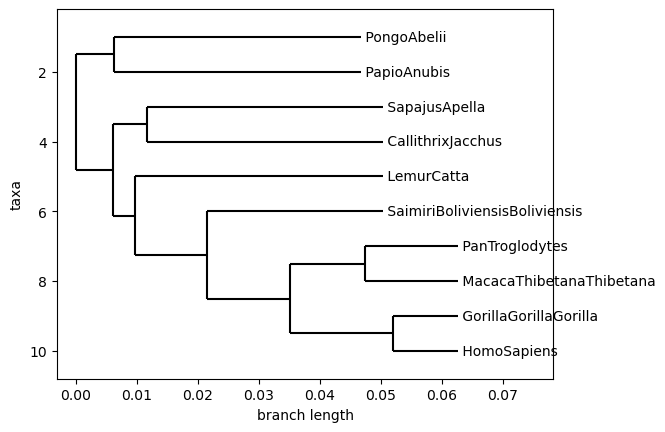

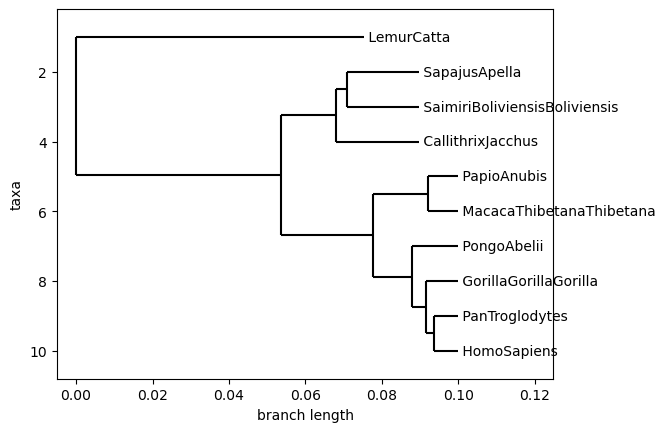

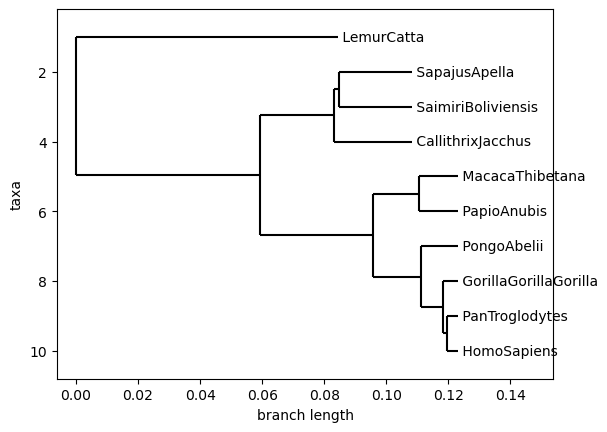

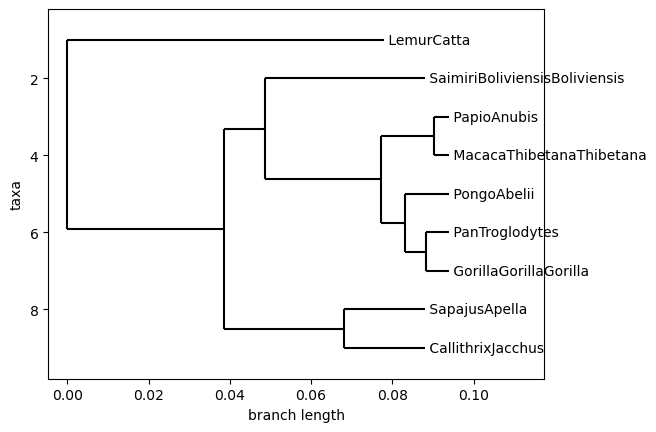

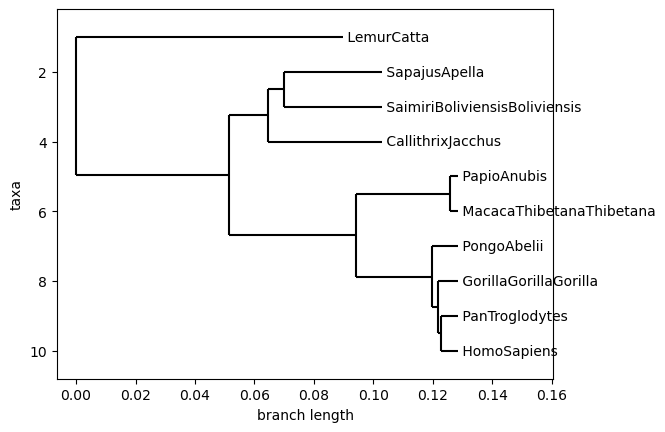

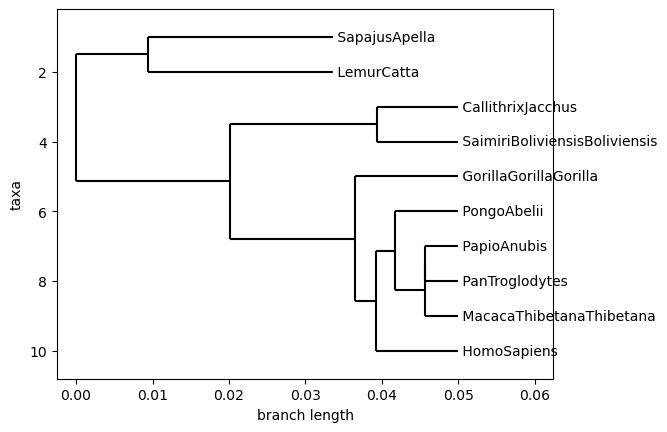

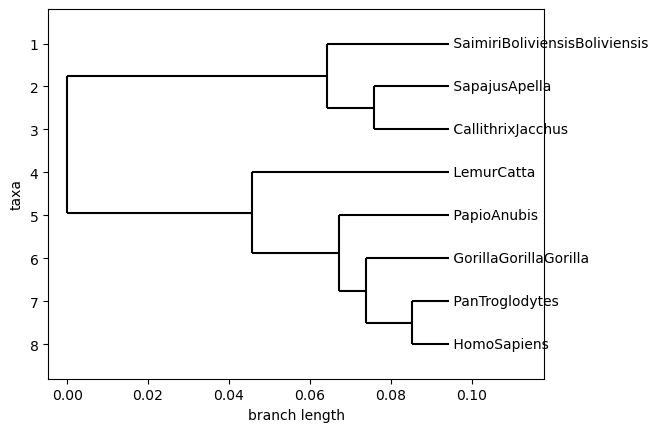

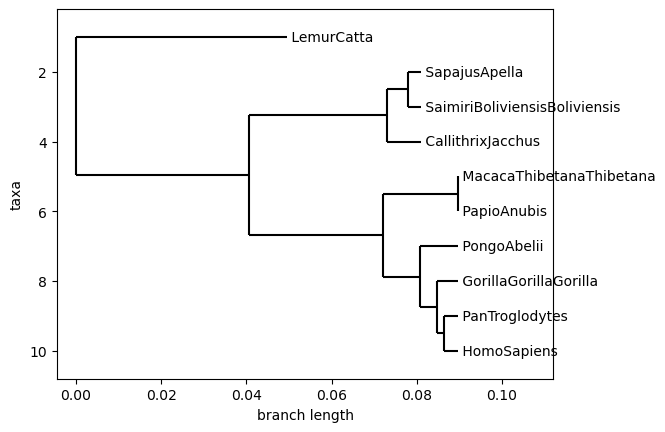

In [219]:
for i in cluster_trees.values():
    draw_tree(i)

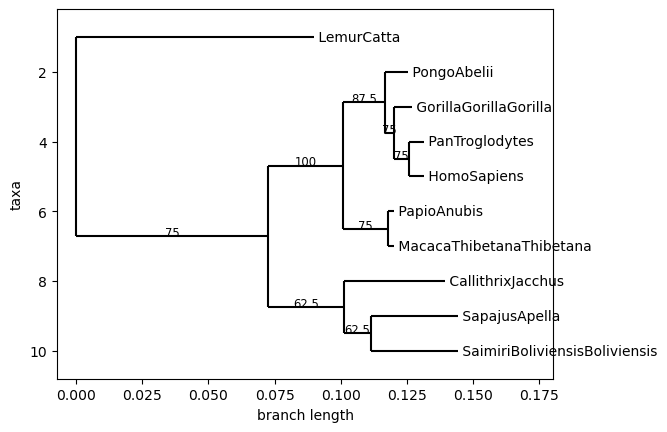

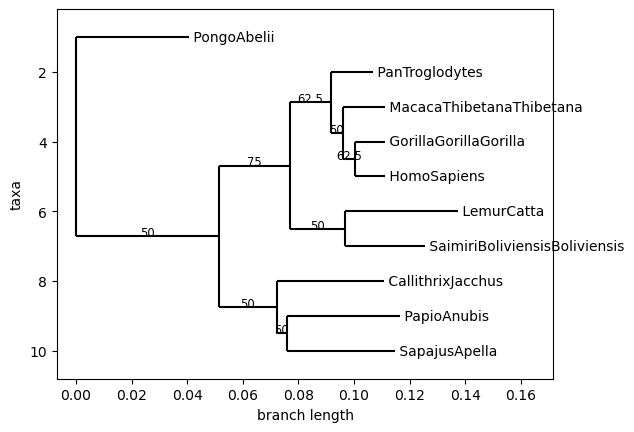

In [226]:
draw_tree(group_cons)
draw_tree(cluster_cons)

In [221]:
d, e, c = matrix_parser("proteins/matrices/all_matrix.txt")

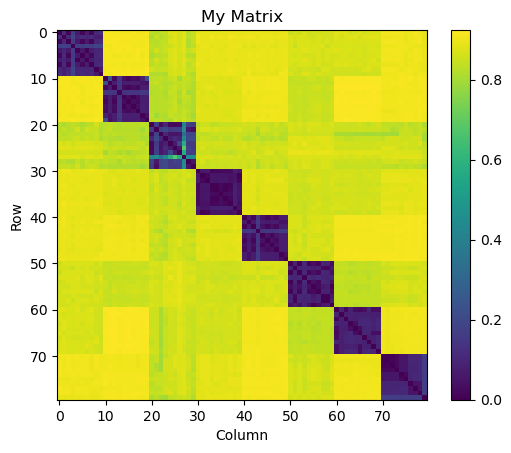

In [222]:
plt.imshow(d, cmap='viridis')
plt.colorbar()
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('My Matrix')

plt.show()